### This notebook demostrates how compute the approximate leave one out cross validation score


In [1]:
from psis import psisloo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from loo import approximate_loo_cv


plt.rcParams['figure.figsize'] = (15,8)

### This should be of shape  (n samples , m data points)

In [2]:
likelihood_samples = np.loadtxt('data/3params_test_loo.txt')
print(f"likelihood samples shape: {likelihood_samples.shape}")
print(likelihood_samples)

likelihood samples shape: (20002, 124)
[[ 7.43070131  8.06625373  8.05197202 ...  3.46569764  8.06104641
   5.75769722]
 [ 3.75179537  3.31665199  5.84817338 ...  0.18330377  8.0948403
   4.03349055]
 [ 4.71407594  4.59973576  6.45553251 ... -2.32924293  8.08719706
   3.79239239]
 ...
 [ 7.48418246  8.15148211  8.08026338 ...  7.64041883  7.68104269
   7.79585801]
 [ 7.48995093  8.15581971  8.08098306 ...  7.70931389  7.66861509
   7.82854992]
 [ 7.48890916  8.15504586  8.08085735 ...  7.68831109  7.68943208
   7.75528059]]


### Let's also load in the data from plotting purposes


In [3]:
data = np.loadtxt('data/data.txt')
print(f" data shape: {data.shape}")
N_DATA = data.shape[0]

 data shape: (124, 4)


### Calculate the leave one out score

In [4]:
loo, loo_i , pareto_k = psisloo(likelihood_samples)

/Users/petermcgill/exo-loo/psis.py:295: RuntimeWarning: overflow encountered in exp
  np.exp(temp, out=temp)


### Now let's plot the data, and colour the data points on how well the model would have predicted them if we had left them out

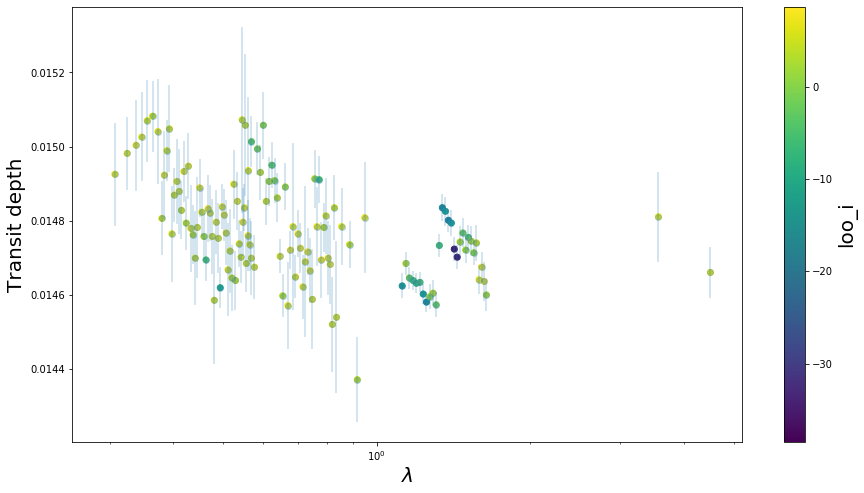

In [5]:
plt.clf()
plt.errorbar(data[:,0], data[:,2],yerr=data[:,3],fmt='o',alpha=0.25)
plt.scatter(data[:,0], data[:,2] ,c=loo_i)
plt.xscale('log')
plt.ylabel('Transit depth',fontsize=20)
plt.xlabel('$\lambda$',fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loo_i',fontsize=20)
plt.show()

### Plot the distribution of loo_i

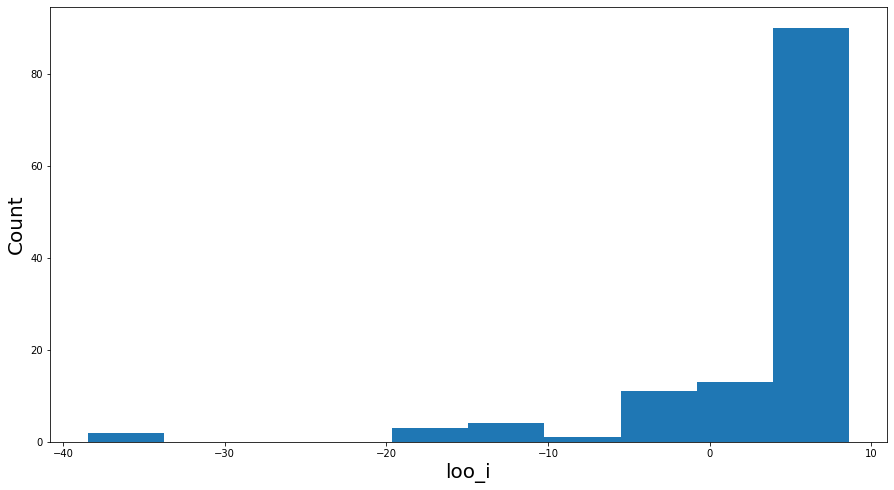

In [6]:
plt.clf()
plt.hist(loo_i)
plt.xlabel('loo_i',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

### Now lets look at the diagnostic psis-loo give the Pareto-K values

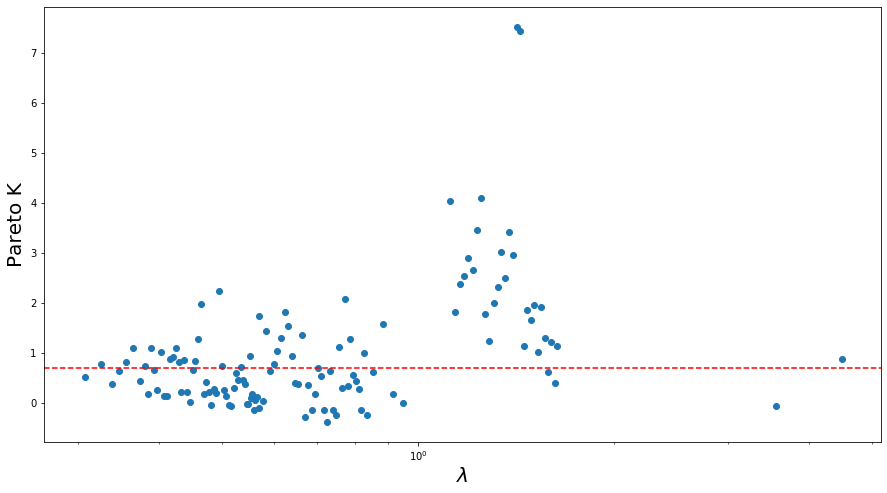

109


0.7248

In [7]:
plt.clf()
plt.scatter(data[:,0],pareto_k)
plt.xscale('log')
plt.axhline(0.7,linestyle='--',color='red',label="threshold")
plt.ylabel('Pareto K',fontsize=20)
plt.xlabel('$\lambda$',fontsize=20)
plt.show()

print(np.argmax(pareto_k))
data[np.argmin(pareto_k),0]


In [8]:
print(f"Refit the model leaving the following data points out in turn: lambda = \n {data[:,0][pareto_k > 0.7]}")

Refit the model leaving the following data points out in turn: lambda = 
 [0.3247 0.3555 0.3643 0.3797 0.3885 0.4017 0.4149 0.4193 0.4237 0.4281
 0.4369 0.4545 0.4589 0.4633 0.4941 0.4985 0.5336 0.5511 0.5687 0.5843
 0.5999 0.6077 0.6155 0.6233 0.6311 0.6389 0.6623 0.7561 0.7717 0.7874
 0.8264 0.8851 1.1217 1.1402 1.1588 1.1774 1.1959 1.2145 1.233  1.2516
 1.2702 1.2887 1.3073 1.3259 1.3444 1.363  1.3815 1.4001 1.4187 1.4372
 1.4558 1.4744 1.4929 1.5115 1.53   1.5486 1.5672 1.6043 1.6391 4.5   ]
